# Demo for the DoWhy causal API
We show a simple example of adding a causal extension to any dataframe. 

In [1]:
import os, sys
sys.path.append(os.path.abspath("../../../"))

In [2]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [3]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
#data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

treatment= data["treatment_name"][0]
outcome = data["outcome_name"][0]
common_cause = data["common_causes_names"][0]
df

W0     v0         y
0    0.230046  False  0.328777
1   -0.625509   True  3.794958
2   -2.600417  False -5.214096
3    0.146942  False  1.361876
4   -0.919551  False -2.228864
..        ...    ...       ...
995 -0.063647  False  0.117779
996 -1.962547  False -4.034488
997 -0.089728   True  5.780041
998 -0.334302   True  3.872871
999 -2.410448  False -4.524930

[1000 rows x 3 columns]

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W0', 'U']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


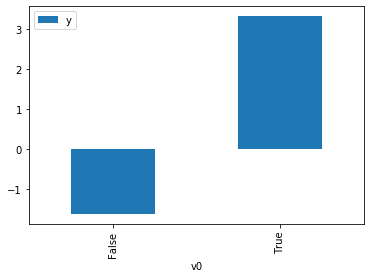

In [4]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x=treatment,
                     variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
                     outcome=outcome,
                     common_causes=[common_cause]).groupby(treatment).mean().plot(y=outcome, kind='bar')

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W0', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


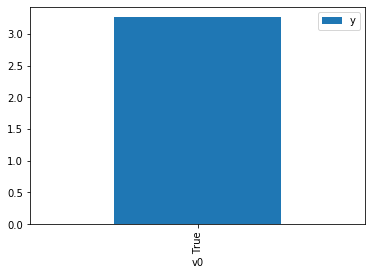

In [5]:
df.causal.do(x={treatment: 1}, 
              variable_types={treatment:'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome,
              method='weighting', 
              common_causes=[common_cause],
              proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

In [6]:
cdf_1 = df.causal.do(x={treatment: 1}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={treatment: 0}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)


INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W0', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W0', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers ass

In [7]:
cdf_0

W0     v0         y  propensity_score    weight
0   -0.583286  False -2.456860          0.574597  1.740350
1   -1.853274  False -3.699267          0.754520  1.325346
2   -1.530711  False -4.384006          0.713824  1.400906
3   -0.036469  False -2.269524          0.486654  2.054847
4   -1.749115  False -3.311137          0.741816  1.348043
..        ...    ...       ...               ...       ...
995 -1.227516  False -0.875867          0.672107  1.487859
996 -0.405553  False -1.427872          0.546258  1.830637
997  0.230046  False  0.328777          0.443752  2.253509
998 -2.157752  False -4.830362          0.789181  1.267136
999 -0.453149  False -2.167928          0.553884  1.805431

[1000 rows x 5 columns]

In [8]:
cdf_1

W0    v0         y  propensity_score    weight
0   -0.229733  True  4.754793          0.482075  2.074366
1   -0.238390  True  4.487643          0.480676  2.080404
2   -2.161507  True -1.700668          0.210415  4.752520
3   -1.639879  True  2.173829          0.271959  3.677028
4    0.030840  True  4.465655          0.524224  1.907580
..        ...   ...       ...               ...       ...
995 -1.688769  True  2.404017          0.265737  3.763121
996 -0.910527  True  2.528176          0.374608  2.669460
997 -2.838431  True -0.226373          0.146704  6.816457
998  0.429132  True  6.865883          0.587791  1.701285
999 -1.509348  True  2.153207          0.289010  3.460088

[1000 rows x 5 columns]

## Comparing the estimate to Linear Regression
First, estimating the effect using the causal data frame, and the 95% confidence interval.

In [9]:
(cdf_1['y'] - cdf_0['y']).mean()

In [10]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

Comparing to the estimate from OLS.

In [11]:
model = OLS(np.asarray(df[outcome]), np.asarray(df[[common_cause, treatment]], dtype=np.float64))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              7544.
Date:                Tue, 07 Jan 2020   Prob (F-statistic):                        0.00
Time:                        11:54:35   Log-Likelihood:                         -1408.7
No. Observations:                1000   AIC:                                      2821.
Df Residuals:                     998   BIC:                                      2831.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2679      0.025     89.049      0.000       2.218       2.318
x2             5.0091      0.050    100.297      0.000       4.911       5.107
==============================================================================
Omnibus:                        2.664   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.431
Skew:                          -0.049   Prob(JB):                        0.297
Kurtosis:                       2.779   Cond. No.                         2.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""